<a href="https://colab.research.google.com/github/Harishkumar-J/Market-Data-Analysis/blob/main/Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ========================================
# 📊 Market Transaction Analysis Project
# ========================================

# **✒ Initial packages and data load**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Pandas** - For handling and analyzing *tabular data*. Reading CSV/Excel files, cleaning data, grouping, aggregations.

**Numpy** - Numerical computations and arrays. Often used with pandas for fast calculations.

**matplotlib.pyplot** - Base Python library for creating plots/graphs

**seaborn** - Statistical visualization library built on top of Matplotlib.
Makes prettier and easier plots with less code.

In [4]:
import plotly.express as px

**plotly.express** - This library  is used to create interactive plots and visualizations.

In [5]:
from ast import literal_eval
from datetime import datetime

**ast.literal_eval** - Safely evaluates a string that looks like a Python literal into a Python object.

Example: turning a string **"['Ketchup', 'Shaving Cream', 'Light Bulbs']"** *(Product colum in CSV file)* into a python list => ['Ketchup', 'Shaving Cream', 'Light Bulbs']

**datetime** - Useful for parsing date strings or calculating time differences


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

**set_option** - Show all columns when printing a DataFrame, don’t truncate them *(by default, pandas may hide some columns if there are too many)*

**sns.set_style("whitegrid")** - This is a Seaborn global style setting.
"whitegrid" adds a white background with light gray gridlines to all plots.

In [8]:
file_path = "/content/drive/MyDrive/Greenwich/Project_Market_Analysis/Retail_Transactions_Dataset.csv"

df = pd.read_csv(file_path)
df.head()


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [9]:
print("Data Shape:", df.shape)

Data Shape: (1000000, 13)


# **⚒ Data Cleaning**

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

**pd.to_datetime()** - Converts a column (here df['Date']) into pandas datetime objects (datetime64[ns] dtype).
This makes it easier to filter by date, extract year/month/day, do time differences, etc.

**errors='coerce** - invalid rows become NaT*(Not a Time)*

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

so now the data frame with added new columns will look like,             
             
              Date   Year  Month Day Hour
2022-01-21 06:27:29 ----  2022   ----  1  ----21  ---- 6

2022-02-15 14:45:10  ----   2022  ----    2  ---- 15   ----  14

In [12]:
df['Product'].head()

,Product
0,"['Ketchup', 'Shaving Cream', 'Light Bulbs']"
1,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P..."
2,['Spinach']
3,"['Tissues', 'Mustard']"
4,['Dish Soap']


In [13]:
df['Product'] = df['Product'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

**apply(lambda x: ... if)** -
Goes through each row in the Product column and applies a function.

**isinstance(x, str)** -
Checks if the current value is a string.

If it's already a Python list, we don't want to touch it.

**literal_eval(x)** -
Converts the string representation of a Python object into the actual object

In [14]:
df['Product'].head()

,Product
0,"[Ketchup, Shaving Cream, Light Bulbs]"
1,"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]"
2,[Spinach]
3,"[Tissues, Mustard]"
4,[Dish Soap]


In [15]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
Year                      0
Month                     0
Day                       0
Hour                      0
dtype: int64


Checking for Missing values


In [16]:
df['Promotion'] = df['Promotion'].fillna("None")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  object        
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  object        
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  object        
 11  Season             1000000 non-null  object        
 12  Promotion          1000000 non-null  object        
 13  Year               1000000 n

In [18]:
df['Transaction_ID'] = df['Transaction_ID'].astype(str)

*To ensure the **IDs are treated as text** rather than numbers, which can prevent issues with leading zeros or other numeric interpretations.*

In [19]:
str_cols = ['Customer_Name','Payment_Method','City','Store_Type','Customer_Category','Season','Promotion']
for col in str_cols:
    df[col] = df[col].str.strip()

*Strip leading/trailing spaces in text columns*

# **⚡ Exploratory Data Analysis**

In [20]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                                 Date     Total_Items      Total_Cost  \
count                        1000000  1000000.000000  1000000.000000   
mean   2022-03-10 21:46:28.440430080        5.495941       52.455220   
min              2020-01-01 00:03:54        1.000000        5.000000   
25%    2021-02-03 23:15:59.249999872        3.000000       28.710000   
50%       2022-03-10 19:23:17.500000        5.000000       52.420000   
75%              2023-04-14 23:06:37        8.000000       76.190000   
max              2024-05-18 19:31:03       10.000000      100.000000   
std                              NaN        2.871654       27.416989   

                 Year           Month             Day            Hour  
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000  
mean      2021.716168        6.199467       15.643938       11.506956  
min       2020.000000        1.000000        1.000000        0.000000  
25%       2021.000000        3.000000    

##  **Revenue Distribution**

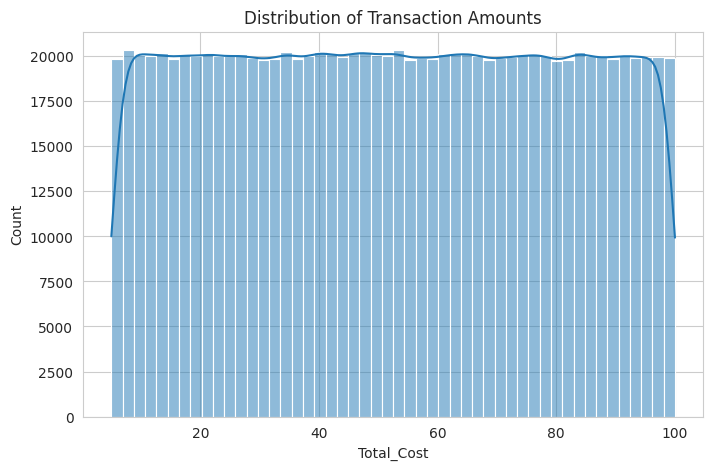

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Cost'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

The **x-axis** = transaction amount (Total_Cost).

The **y-axis** = number of transactions in each bin.

The distribution looks almost uniform between 10 and 100 (flat shape, similar heights). That means transactions are roughly equally likely at different amounts in your dataset (no clear peak or skew).

***Transaction amounts are evenly spread out across the 0–100 range, without strong peaks or clustering***

flat distribution suggests:

Maybe the dataset is synthetic / simulated.

Or maybe Total_Cost has been normalized/scaled to a 0–100 range.

## Basket Size Distribution

In [22]:

fig = px.histogram(
    df,
    x="Total_Items",
    nbins=20,
    title="Distribution of Basket Size (# of Items)",
    labels={"Total_Items": "Basket Size (# of Items)", "count": "Number of Transactions"},
    opacity=0.8
)
fig.update_traces(marker_color="skyblue", marker_line_color="black", marker_line_width=1)


fig.update_layout(width=800, height=500)

fig.show()

**fig.update_traces(...)**: This line customizes the appearance of the histogram bars.

In this dataset, customers are equally likely to purchase between 1 and 10 items per transaction. Each basket size has about 100,000 transactions, which is unusual in real-world retail but expected in a balanced dataset